## Notebook for Spectogram and Melspectogram

In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.transforms as transforms
from data import *

In [2]:
train_loader,test_loader, val_loader  = getData()
audios, labels = next(iter(train_loader))

In [3]:
import Spectrograms as sp

In [ ]:
def createSpectograms(audio):
    audio = audios[0]

    # Create magnitude and phase
    stft_transform = torchaudio.transforms.Spectrogram(n_fft=256, hop_length=128)
    stft = stft_transform(audio)

    # Phase
    phase = stft.angle()
    # Maginitude
    maginitude = transforms.AmplitudeToDB()(stft)

    # Melspectogram
    mel_transform = torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft=512, hop_length=128, n_mels=128)
    mel_spec = mel_transform(audio)

    mel_spectogram = transforms.AmplitudeToDB()(mel_spec)

    specs = torch.cat((maginitude[:,:-1,:], phase[:,:-1,:], mel_spectogram), dim=0) # shape [2, 128, 126]

    return specs

In [4]:
stft_ = sp.STFT(n_fft=2048,hop_length=128, sr=16000,freq_bins=128,freq_scale='log',fmin=40,fmax=8000,verbose=False)


In [7]:
mag = stft_(audios.to("cuda"), 'Phase')
#db_mag = torchaudio.functional.amplitude_to_DB(mag.abs(), 20, 1e-05, 1)



In [8]:
mag.shape

torch.Size([32, 128, 126])

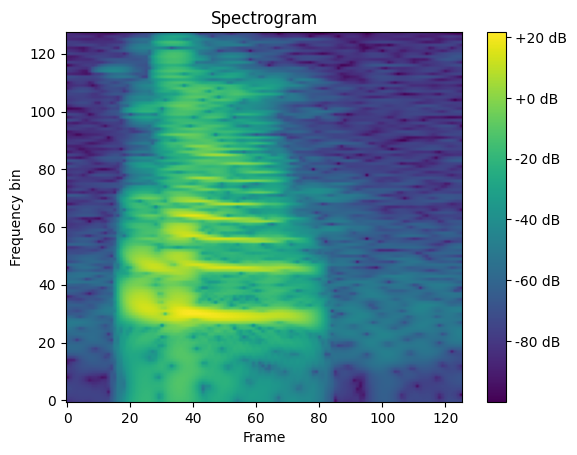

torch.Size([32, 128, 126])


In [6]:
plt.imshow(db_mag[0].cpu().numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frame')
plt.ylabel('Frequency bin')
plt.title('Spectrogram')
plt.show()
print(db_mag.shape)

In [ ]:
path = "/home/prasanna/Documents/UNIFI/Deep Learning/CLAR/SpeechCommands/speech_commands_v0.02/dog/0a2b400e_nohash_0.wav"

In [ ]:
def createSpectograms(audio):
    audio = audios[0]

    # Create magnitude and phase
    stft_transform = torchaudio.transforms.Spectrogram(n_fft=256, hop_length=128)
    stft = stft_transform(audio)

    # Phase
    phase = stft.angle()
    # Maginitude
    maginitude = transforms.AmplitudeToDB()(stft)

    # Melspectogram
    mel_transform = torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft=512, hop_length=128, n_mels=128)
    mel_spec = mel_transform(audio)

    mel_spectogram = transforms.AmplitudeToDB()(mel_spec)

    specs = torch.cat((maginitude[:,:-1,:], phase[:,:-1,:], mel_spectogram), dim=0) # shape [2, 128, 126]

    return specs





In [ ]:
waveform = audios[0]
spec = torchaudio.transforms.Spectrogram(n_fft=256, hop_length=128 )
sig = spec(waveform)

#sig = sig.abs()

sig = transforms.AmplitudeToDB()(sig)
plt.imshow(sig[0].numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frame')
plt.ylabel('Frequency bin')
plt.title('Spectrogram')
plt.show()
print(sig.shape)

In [ ]:

sample_rate = 16000
# Apply the Short-Time Fourier Transform (STFT) to the waveform
n_fft = 256  # Number of Fourier bins
hop_length = 128  # Hop length for STFT
stft = torch.stft(waveform, n_fft=n_fft, hop_length=hop_length, return_complex=True)
spectrogram = torch.abs(stft)

power_spectrogram = spectrogram ** 2

spectrogram = transforms.AmplitudeToDB()(power_spectrogram)

print(spectrogram.shape)
plt.imshow(spectrogram[0].numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frame')
plt.ylabel('Frequency bin')
plt.title('Spectrogram')
plt.show()

In [ ]:

mel_spec = torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft=2048, hop_length=128, n_mels=128,f_min=40, f_max=8000, mel_scale="slaney")
sig = mel_spec(audios[0])                   #n_fft=2048,hop_length=128, n_mels=128,sr=16000,min=40,fmax=8000,

sig = transforms.AmplitudeToDB()(sig)

# Display the Mel spectrogram
plt.imshow(sig[0].numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frame')
plt.ylabel('Mel bin')
plt.title('Mel Spectrogram')
plt.show()
print(sig.shape)



In [ ]:
# Load the audio waveform
waveform = audios[0]
sample_rate = 16000

# Define the STFT parameters
window_size = int(0.016 * sample_rate)  # 16ms
stride = int(0.008 * sample_rate)  # 8ms

# Create the STFT transform
stft_transform = transforms.Spectrogram(
    n_fft=window_size,
    hop_length=stride,
    power=None
)

# Apply the transform to the waveform
stft = stft_transform(waveform)
phase = stft.angle()

# Plot the phase STFT
plt.figure(figsize=(10, 6))
plt.imshow(phase[0], aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f radians')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.title('Phase STFT')
plt.show()
print(phase.shape)

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def create_spectrogram(audio_file):
    # Load audio file
    audio_data, sample_rate = librosa.load(audio_file)

    # Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_fft=512, hop_length=128)

    # Convert to dB scale
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Display spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()
    return spectrogram_db

# Example usage
audio_file = 'SpeechCommands/speech_commands_v0.02/bed/0a7c2a8d_nohash_0.wav'
e = create_spectrogram(audio_file)

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def create_spectrogram(audio_file):
    # Load audio file
    audio_data, sample_rate = librosa.load(audio_file)

    # Compute spectrogram
    spectrogram = librosa.stft(audio_data)

    # Convert to dB scale
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

    # Display spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()
    return spectrogram_db

# Example usage
audio_file = 'SpeechCommands/speech_commands_v0.02/bed/0a7c2a8d_nohash_0.wav'
e = create_spectrogram(audio_file)